In [1]:
import sys
import os



# Go two levels up: from 'notebooks/task1/' to the project root
sys.path.append(os.path.abspath(os.path.join( '..')))

In [2]:
import pandas as pd
df = pd.read_csv(r'C:\Users\ABC\Desktop\10Acadamy\week 2\playstore-bank-reviews\data\reviews_sentiment_comparison.csv') 

In [3]:
from src.further_topic_extraction import get_theme_keywords,print_theme_keywords,print_sentiment_samples_by_bank, count_multiple_theme_occurrences
theme_dict = get_theme_keywords(df)
print_theme_keywords(theme_dict)

Bank: CBE, Sentiment: POSITIVE, Top Keywords: ['app', 'good', 'best', 'easy', 'nice', 'use', 'fast', 'application', 'cbe', 'great', 'bank', 'like', 'banking', 'simple', 'service']
Bank: CBE, Sentiment: NEGATIVE, Top Keywords: ['app', 'update', 'working', 'good', 'work', 'transaction', 'bank', 'doesn', 'use', 'account', 'time', 'money', 'application', 'cbe', 'fix']
Bank: BOA, Sentiment: POSITIVE, Top Keywords: ['app', 'good', 'great', 'best', 'bank', 'nice', 'boa', 'easy', 'like', 'fast', 'application', 'service', 'thank', 'banking', 'use']
Bank: BOA, Sentiment: NEGATIVE, Top Keywords: ['app', 'work', 'working', 'worst', 'bank', 'banking', 'mobile', 'doesn', 'update', 'use', 'fix', 'time', 'boa', 'application', 'slow']
Bank: Dashen, Sentiment: POSITIVE, Top Keywords: ['app', 'dashen', 'best', 'bank', 'super', 'easy', 'banking', 'use', 'fast', 'good', 'amazing', 'step', 'features', 'application', 'user']
Bank: Dashen, Sentiment: NEGATIVE, Top Keywords: ['app', 'good', 'slow', 'bank', 'da

In [4]:
# Example usage:
print_sentiment_samples_by_bank(df, bank_col='bank', sentiment_col='distilbert_sentiment', review_col='review', n=10)



========== Bank: CBE ==========

--- POSITIVE REVIEWS ---
1. I'm always using the Apps safely.Thanks.
2. Very nice and fast app
3. very very nice aplication
4. Please include full Bank statement access through this app
5. Good job, try your best. You can do anything you need.
6. It is good but not fast
7. This App The Best One
8. I like this application and It's very useful
9. Very good thank you
10. Simple and secure app

--- NEGATIVE REVIEWS ---
1. The worst app ever made! I transfered money to abyssinia bank account, deducted the money from my cbe account but never made it through to my abyssinia account! I hate this app and bank! Idk why they are making me wait a whole week to return my money! Even there call center 951 doesn't work! Shame!
2. Yesterday, system hackers have taken money out of my CBE account due to problems related with the CBE BIRR SMS and internet banking systems.You must further increase security of the system.I am willing to give further details if necessary. S

## Sample Insight Write-up (with Evidence)

### CBE

**Top drivers:**
- “easy”, “fast”, “simple” and “good” are among the most frequent positive words (e.g., “easy” in top 4).
- Indicates users find the app simple and efficient for banking needs.

**Pain points:**
- “update”, “working”, “fix”, and “transaction” frequently appear in negative reviews.
- **Evidence:** “update” is the 2nd most common negative word, suggesting app updates cause issues or dissatisfaction.

---

### BOA

**Top drivers:**
- “good”, “easy”, “fast”, “great”, “nice”, “thank”—positive customer sentiment is centered on ease of use and speed.

**Pain points:**
- “work”, “working”, “worst”, “doesn’t”, “update”, “fix”, “slow”.
- **Evidence:** “work” and “slow” indicate performance problems are a major user frustration.

---

### Dashen

**Top drivers:**
- “easy”, “super”, “fast”, “features”, “amazing”, “user”.
- Customers highlight advanced features and ease of use as key strengths.

**Pain points:**
- “slow”, “working”, “transaction”, “speed”, “worst”, “account”.
- **Evidence:** “slow” is a highly cited pain point, pointing to lag/performance issues.



In [5]:
theme_list = ['crash', 'login', 'transaction', 'slow', 'update']
theme_counts_df = count_multiple_theme_occurrences(df, themes=theme_list)
print(theme_counts_df)


      bank sentiment        theme  count
0      CBE  POSITIVE        crash      1
1      CBE  NEGATIVE        crash      4
2      BOA  POSITIVE        crash      0
3      BOA  NEGATIVE        crash      8
4   Dashen  POSITIVE        crash      0
5   Dashen  NEGATIVE        crash      0
6      CBE  POSITIVE        login      0
7      CBE  NEGATIVE        login      3
8      BOA  POSITIVE        login      1
9      BOA  NEGATIVE        login     21
10  Dashen  POSITIVE        login      2
11  Dashen  NEGATIVE        login      1
12     CBE  POSITIVE  transaction     26
13     CBE  NEGATIVE  transaction    101
14     BOA  POSITIVE  transaction      0
15     BOA  NEGATIVE  transaction     18
16  Dashen  POSITIVE  transaction      7
17  Dashen  NEGATIVE  transaction      8
18     CBE  POSITIVE         slow      1
19     CBE  NEGATIVE         slow     11
20     BOA  POSITIVE         slow      2
21     BOA  NEGATIVE         slow     25
22  Dashen  POSITIVE         slow      0
23  Dashen  NEGA

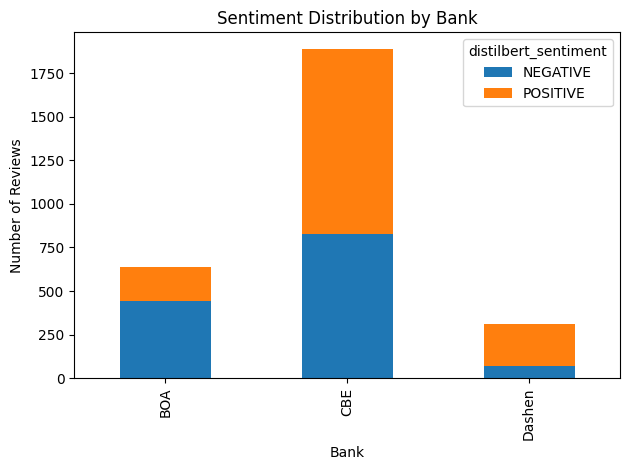

In [6]:
import matplotlib.pyplot as plt

sentiment_by_bank = df.groupby(['bank', 'distilbert_sentiment']).size().unstack().fillna(0)
sentiment_by_bank.plot(kind='bar', stacked=True)
plt.title('Sentiment Distribution by Bank')
plt.ylabel('Number of Reviews')
plt.xlabel('Bank')
plt.legend(title='distilbert_sentiment')
plt.tight_layout()
plt.show()


In [7]:
import plotly.express as px

fig = px.box(
    df, 
    x='bank', 
    y='rating', 
    color='bank',  # This gives each bank a different color
    points="all",  # Shows all individual ratings as jittered points (optional)
    title='Rating Distribution by Bank'
)
fig.update_layout(
    xaxis_title='Bank',
    yaxis_title='Rating',
    boxmode='group'
)
fig.show()



In [8]:
from wordcloud import WordCloud

for sentiment in ['positive', 'negative']:
    text = " ".join(df[df['distilbert_sentiment'] == sentiment]['themes'].explode().astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Theme Word Cloud ({sentiment.title()})")
    plt.axis('off')

    plt.show()


KeyError: 'themes'

In [ ]:
# Assuming df has 'date' column as datetime
trend = df.groupby([pd.Grouper(key='date', freq='W'), 'bank', 'distilbert_sentiment']).size().unstack().fillna(0)
trend.plot()
plt.title('Weekly Sentiment Trend by Bank')
plt.ylabel('Number of Reviews')
plt.show()
